# Volatility Visualization

In [1]:
import requests
import pandas as pd
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
from datetime import date
import numpy as np

API_PATH = """http://app.quotemedia.com/quotetools/getHistoryDownload.csv?&webmasterId=501&startDay={sd}&startMonth={sm}&startYear={sy}&endDay={ed}&endMonth={em}&endYear={ey}&isRanged=true&symbol={sym}"""

start_date, start_month, start_year = 1, 1, 1998
end_date, end_month, end_year = 31, 10, 2019

# In QuoteMedia, months start from 0, so we adjust these variables.
start_month = start_month - 1
end_month = end_month - 1

symbol = 'SPY'

In [2]:
# Get history of a given ticker.

def get_history(api_path, start_date, start_month, start_year, end_date, end_month, end_year, symbol):
    url = api_path.format(sd=start_date, sm=start_month, sy=start_year,
                          ed=end_date, em=end_month, ey=end_year,
                          sym=symbol)
    filepath = 'data/volviz-{}.csv'.format(symbol)
    
    if not os.path.isfile(filepath):
        response = requests.get(url)

        with open(filepath, 'wb') as f:
            f.write(response.content)
        
    df = pd.read_csv(filepath)
    df.dropna(inplace=True, subset=['adjclose'])
    df.date = df.date.astype('datetime64[ns]')
    df = df.sort_values(by=['date'], ascending=True)
    df.set_index('date', inplace=True)
    
    return df

In [3]:
df = get_history(API_PATH, start_date, start_month, start_year, end_date, end_month, end_year, symbol)

In [4]:
df

,open,high,low,close,volume,changed,changep,adjclose,tradeval,tradevol
date,,,,,,,,,,
1998-01-02,97.3100,97.66,96.5300,97.56,2360900,0.341,0.52%,66.5155,NaN,NaN
1998-01-05,97.8400,98.44,96.7800,97.78,4191800,0.150,0.23%,66.6655,NaN,NaN
1998-01-06,97.2500,97.28,96.1900,96.22,3154900,-1.064,-1.60%,65.6019,NaN,NaN
1998-01-07,96.0900,96.72,95.2200,96.47,4424200,0.170,0.26%,65.7724,NaN,NaN
1998-01-08,96.3100,96.31,95.3800,95.63,3831000,-0.573,-0.87%,65.1997,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2019-10-25,299.7400,302.20,299.6806,301.60,45145150,1.230,0.41%,301.6000,1.360991e+10,214969.0
2019-10-28,302.9400,303.85,302.9100,303.30,42076051,1.700,0.56%,303.3000,1.276633e+10,215030.0
2019-10-29,303.0001,304.23,302.8600,303.21,44201626,-0.090,-0.03%,303.2100,1.341349e+10,219958.0


In [5]:
df['rets'] = np.log(df['adjclose']/df['adjclose'].shift(1))
df['vola'] = df['rets'].rolling(252).std() * np.sqrt(252)

In [6]:
df

,open,high,low,close,volume,changed,changep,adjclose,tradeval,tradevol,rets,vola
date,,,,,,,,,,,,
1998-01-02,97.3100,97.66,96.5300,97.56,2360900,0.341,0.52%,66.5155,NaN,NaN,NaN,NaN
1998-01-05,97.8400,98.44,96.7800,97.78,4191800,0.150,0.23%,66.6655,NaN,NaN,0.002253,NaN
1998-01-06,97.2500,97.28,96.1900,96.22,3154900,-1.064,-1.60%,65.6019,NaN,NaN,-0.016083,NaN
1998-01-07,96.0900,96.72,95.2200,96.47,4424200,0.170,0.26%,65.7724,NaN,NaN,0.002596,NaN
1998-01-08,96.3100,96.31,95.3800,95.63,3831000,-0.573,-0.87%,65.1997,NaN,NaN,-0.008745,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-25,299.7400,302.20,299.6806,301.60,45145150,1.230,0.41%,301.6000,1.360991e+10,214969.0,0.004087,0.160290
2019-10-28,302.9400,303.85,302.9100,303.30,42076051,1.700,0.56%,303.3000,1.276633e+10,215030.0,0.005621,0.159440
2019-10-29,303.0001,304.23,302.8600,303.21,44201626,-0.090,-0.03%,303.2100,1.341349e+10,219958.0,-0.000297,0.158382


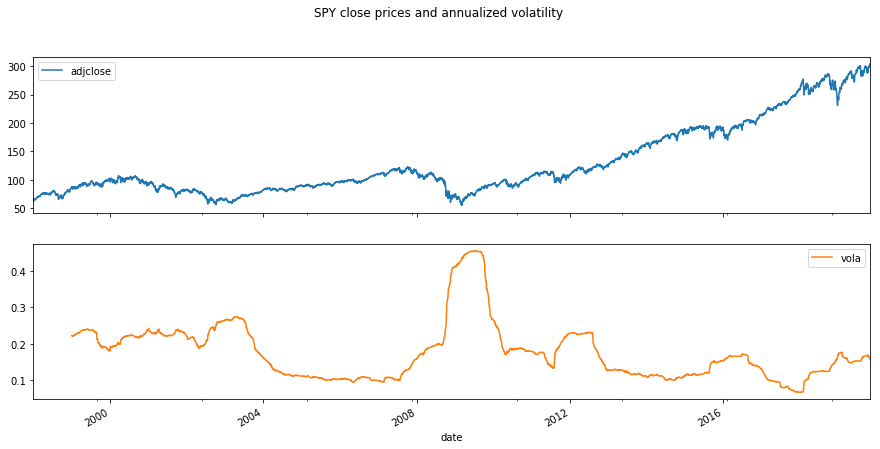

In [7]:
title = "{} close prices and annualized volatility".format(symbol)
_ = df[['adjclose', 'vola']].plot(subplots=True, figsize=(15,7), title=title)